Notebook to experiment with scaling the number of spatial nodes.

Motivation: EigenMarkov diffusion worked with 10 nodes, but there was a mismatch upon scaling to 100 spatial locations.

### INIT

In [1]:
import sys

sys.path.append("../src/")

# Models
from utils.param_utils import get_ca_init_idx
import models.FiniteDiffRxnDiffusion as fdrd
import models.SpectralRxnDiffusion as srd
from utils.RWRunMultiruns import RWRunMultiruns
from utils.EMERunMultiruns import EMERunMultiruns
from utils.RWPlotMultiruns import RWPlotMultiruns
from utils.EMEPlotMultiruns import EMEPlotMultiruns

In [2]:
# PLOTTING
binomial_sampling = False  # use binomial sampling for eme markov simulation
print_eigenvalues_and_vectors = False
print_eigenmode_init_conditions = False
print_eigenmode_transition_probability = False
print_eigenmodes_to_spatial_nodes = False
plot_eigenmodes = False
plot_eigenvectors = False
plot_eigenmode_init_conditions = False
plot_eigenmode_markov_simulation = False

### Parameters

In [3]:
# PARAMETERS
n_particles = 50  # number of molecules
n_space_pts = 101  # number of grid points along 1D line
n_time_pts = 100  # number of time points
ca_init_idx = get_ca_init_idx(n_space_pts)  # impulse site
n_eigenmodes = 101  # NOTE: only used in SpectralRxnDiffusion
n_runs = 10  # number of runs for multirun simulations (stochastic)

### FINITE DIFFERENCE

Stability condition satisfied: 1 <= 3.6363636363636362
Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30


Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Plotting...


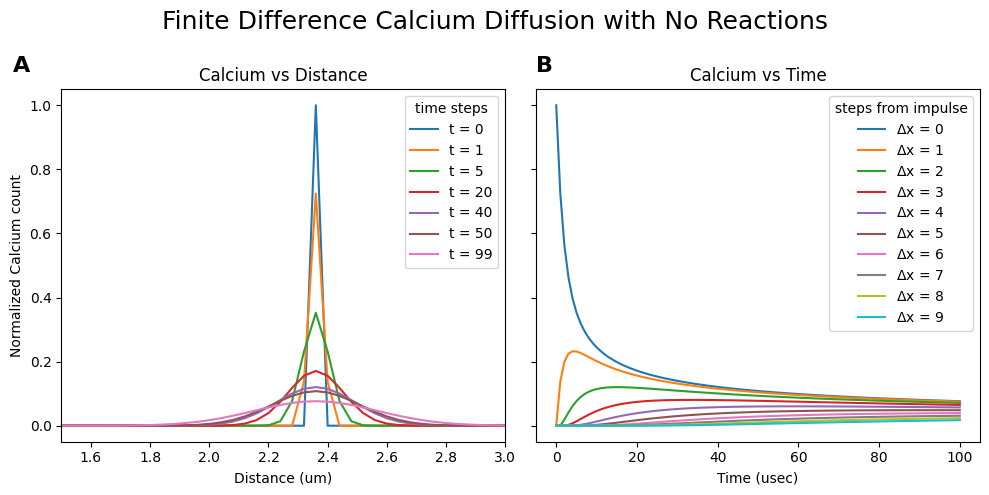

In [5]:
# FINITE DIFFERENCE
# DETERMINISTIC AND NODAL
# NOTE: FD has internal number of particles == 5275
fd = fdrd.FiniteDiffRxnDiffusion(
    n_spatial_locs=n_space_pts, n_time_pts=n_time_pts, impulse_idx=ca_init_idx
)

fd.simulate_diffusion()
fd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### SPECTRAL

Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Plotting...


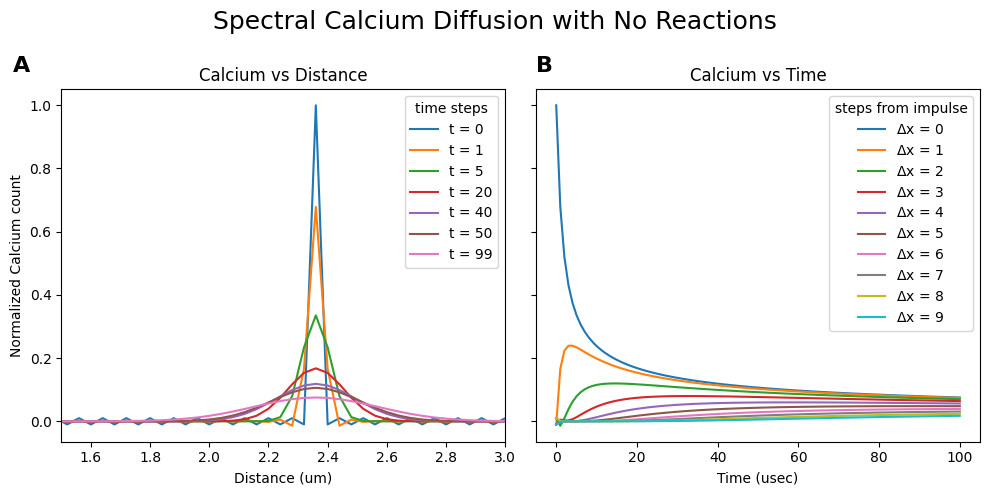

In [6]:
# SPECTRAL
# DETERMINISTIC AND MODAL
# NOTE: SRD has internal number of particles == 5275

sd = srd.SpectralRxnDiffusion(
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    impulse_idx=ca_init_idx,
    n_eigenmodes=n_eigenmodes,
)

sd.simulate_diffusion()
sd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### RANDOM WALK

In [7]:
# RANDOM WALK
# STOCHASTIC AND NODAL
"""
multi_rw = RWRunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx,
)

multi_rw.run_multi(data_dir="../data")
"""

Made new directory: ../data/eme-validation/random-walk/20240404_114614/
RUNNING SIMULATION 0


Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


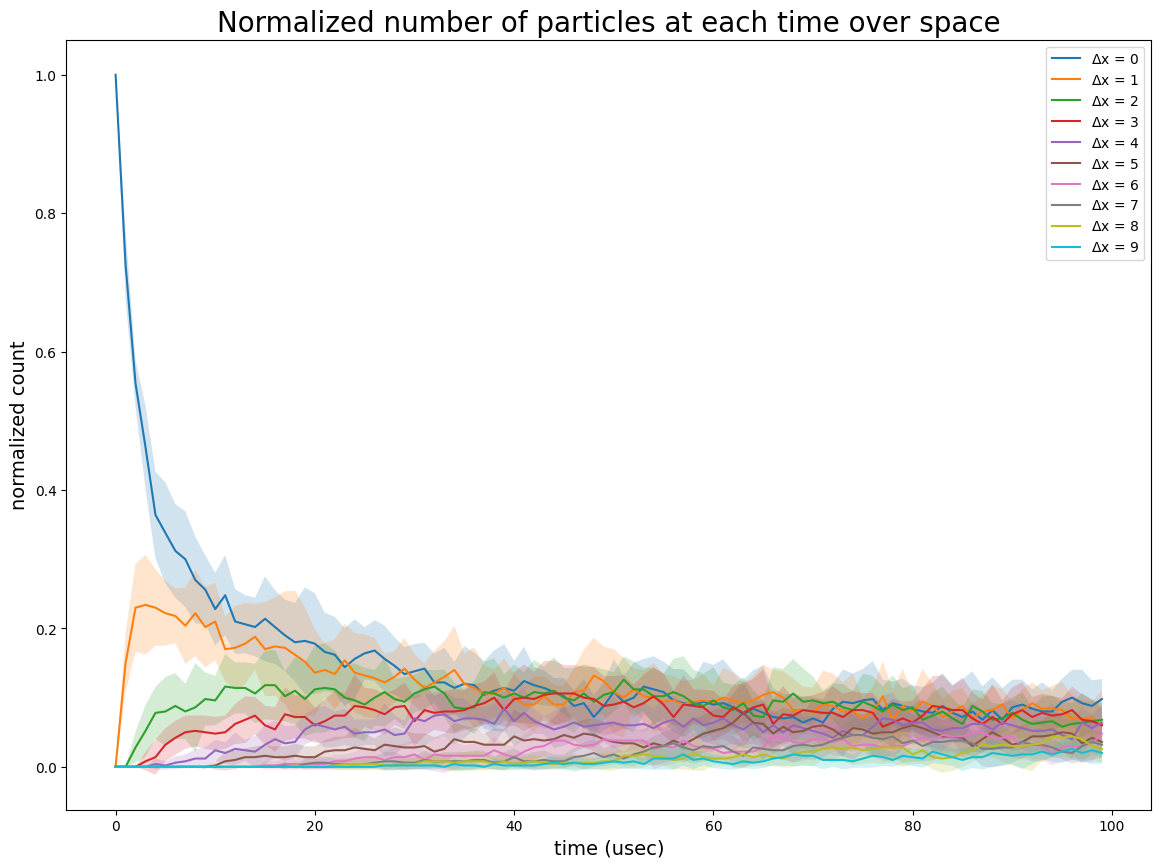

In [5]:
plotter = RWPlotMultiRuns(
    dir="/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240221_122233/",
)

plotter.plot_multiruns_space()

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


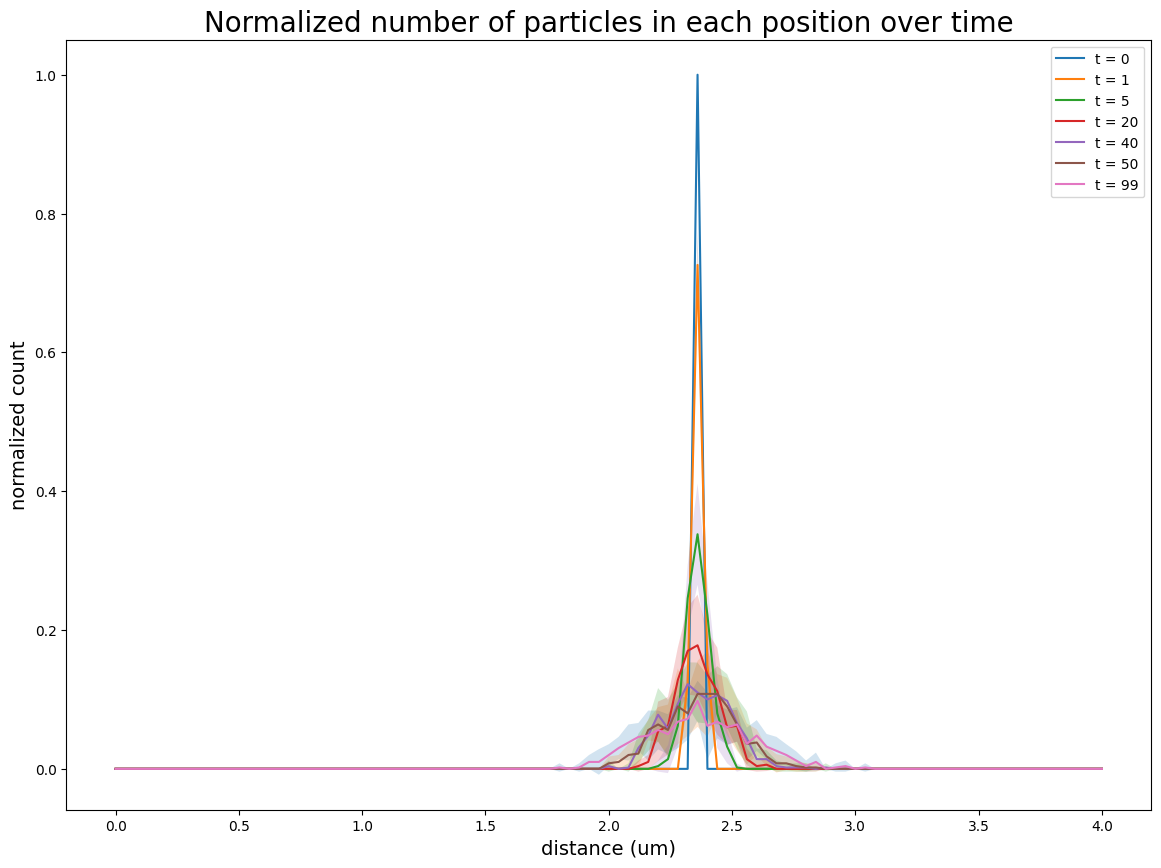

In [6]:
plotter.plot_multiruns_time([0, 1, 5, 20, 40, 50, 99])

### EIGENMARKOV

Made new directory: ../data/eme-validation/markov-eme/20240405_140722/
RUNNING SIMULATION 0
EIGENVALUES
 0     1     2     3     4     5     6     7     8     9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100     
[0.    0.    0.001 0.001 0.002 0.003 0.005 0.007 0.009 0.011 0.013 0.016
 0.019 0.023 0.026 0.03  0.034 0.038 0.043 0.048 0.053 0.058 0.063 0.069
 0.075 0.081 0.087 0.093 0.1   0.107 0.114 0.121 0

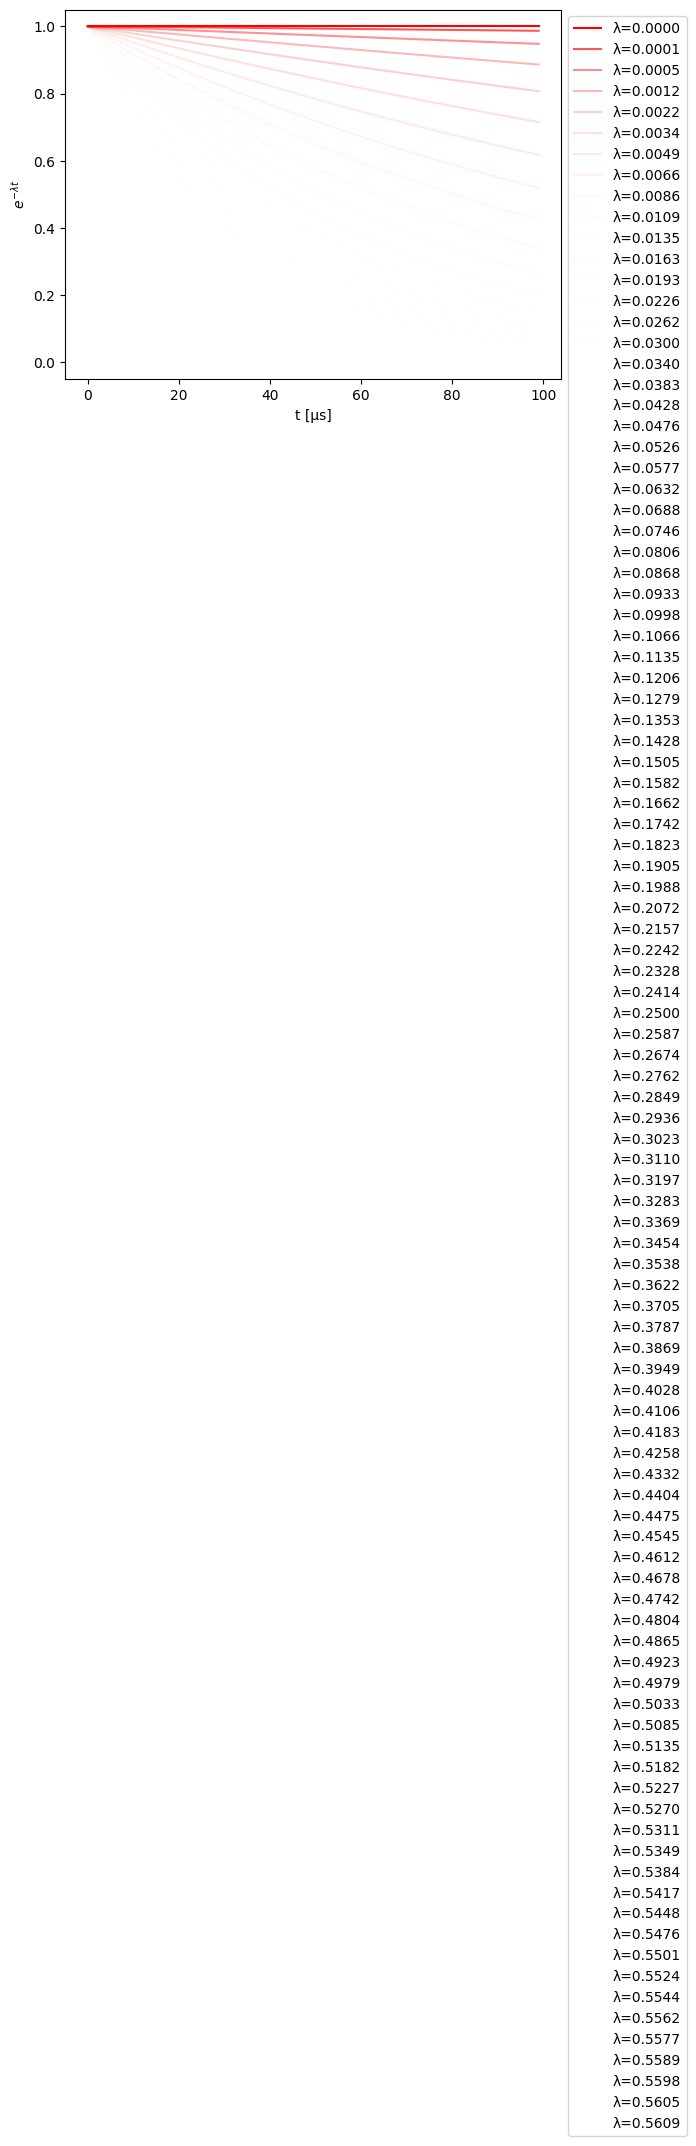

EIGENVECTORS (over space)


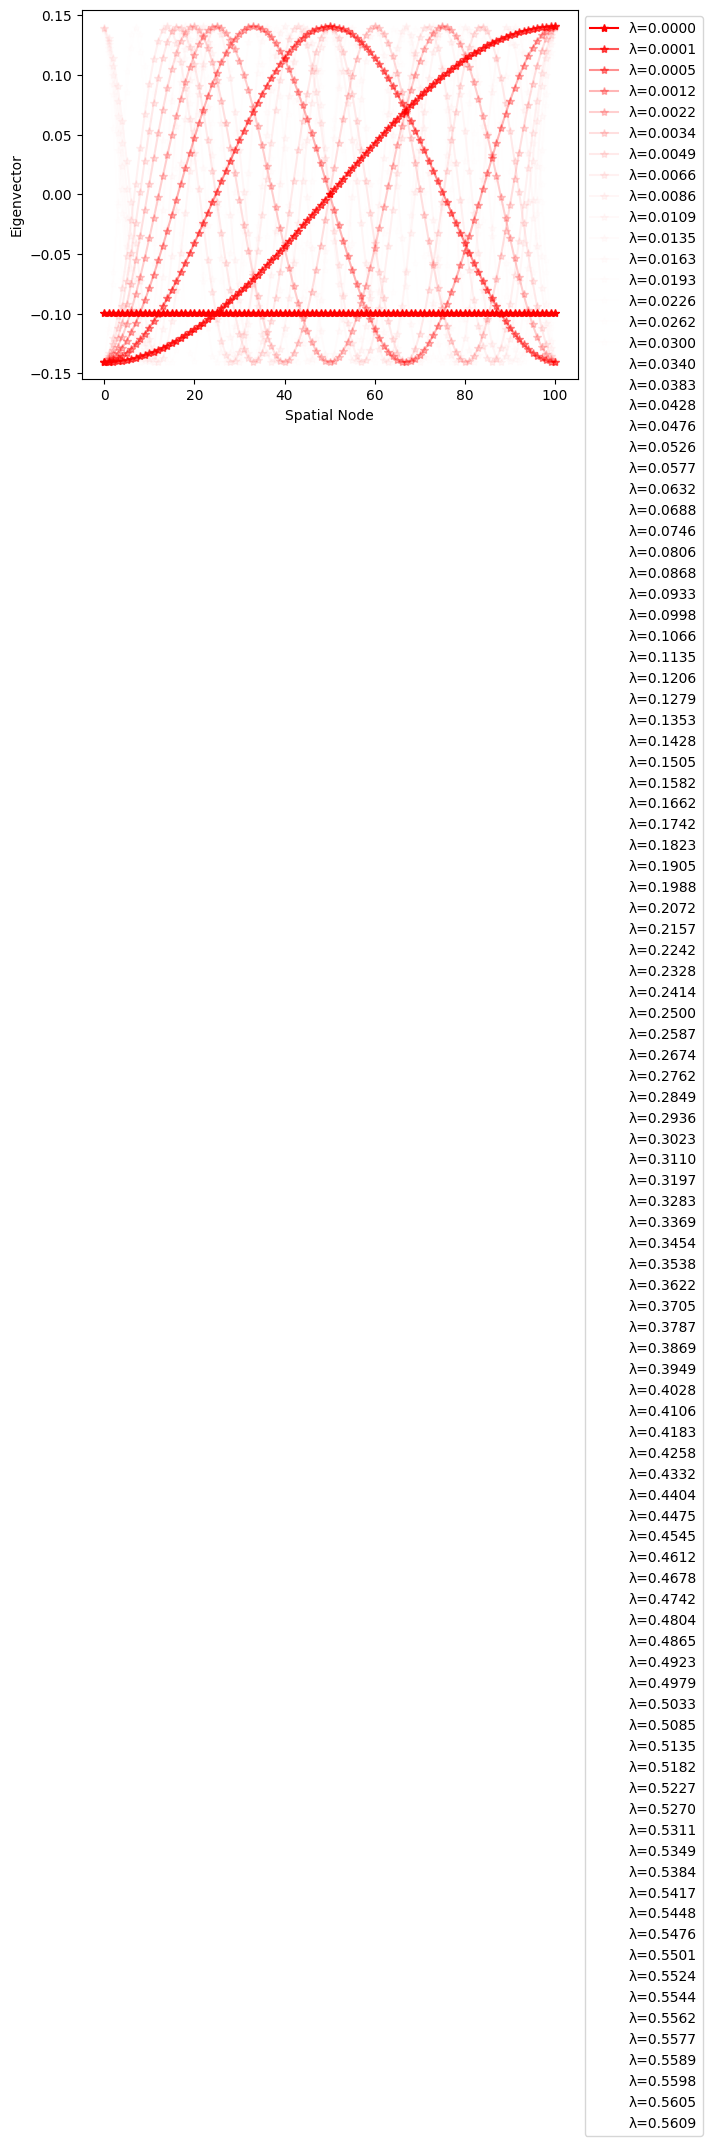

EIGENMODE INITIAL CONDITIONS
POSITIVE
[ 0.          0.          5.16481779  6.33239656  0.          0.
  0.          3.54952904  0.          0.          5.84258946  5.78091442
  0.          6.96716297  3.4546223   4.44769639  6.69834085  0.
  6.37932616  5.08988608 -0.          0.          2.4634811   0.
  6.28393533  0.          6.76207154  4.27599238  3.64357725  0.
  1.41287363  5.90285133  5.71784113  0.          6.98158646  0.
  4.53194504  6.66404133  0.          6.42471277  5.01372328  2.76818908
  0.          2.36068716  5.31091567 -0.          0.          6.79148729
  4.18857855  3.73674417  6.91379748  1.30550944  0.          0.
  0.          0.          0.          4.61509754  6.62812995  0.21881787
 -0.          0.         -0.          0.          0.          5.38204651
  6.18246519  0.          0.          4.10015162  3.82900727  6.89265831
  1.19782948  6.01907762  0.          1.94405221  0.          0.
  4.69713376  0.          0.10942217 -0.          0.          0.
 -0.

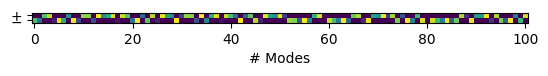

../src/models/EigenmarkovDiffusion.py:313: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


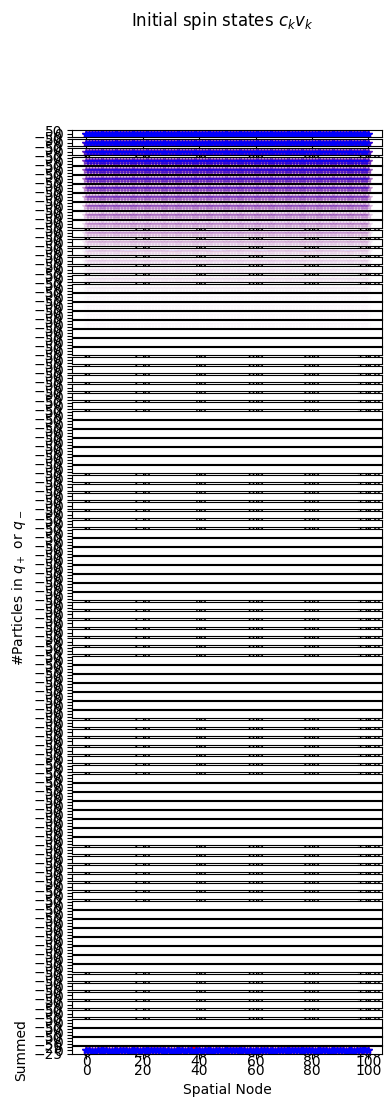

EIGENMODE TRANSITION PROBABILITIES
0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	
0.0e+00 6.8e-05 2.7e-04 6.1e-04 1.1e-03 1.7e-03 2.4e-03 3.3e-03 4.3e-03 5.5e-03 6.7e-03 8.1e-03 9.7e-03 1.1e-02 1.3e-02 1.5e-02 1.7e-02 1.9e-02 2.1e-02 2.4e-02 2.6e-02 2.9e-02 3.2e-02 3.4e-02 3.7e-02 4.0e-02 4.3e-02 4.7e-02 5.0e-02 5.3e-02 5.7e-02 6.0e-02 6.4e-02 6.8e-02 7.1e-02 7.5e-02 7.9e-02 8.3e-02 8.7e-02 9.1e-02 9.5e-02 9.9e-02 1.0e-01 1.1e-01 1.1e-01 1.2e-01 1.2e-01 1.3e-01 1.3e-01 1.3e-01 1.4e-01 1.4e-01 1.5e-01 1.5e-01 1.6e-01 1.6e-01 1.6e-01 1.7e-01 1.7e-01 1.8e-01 1.8e-01 1.9e-01 1.9e-01 1.9e-01 2.0e-01 2.0e-01 2.1e-01 2.1e-01 2.1e-01 2.2e-01 2.2e-01 2.2e-01 2.3e-01 2.3e-01 2.3e-01 2.4e-01 2.4e-01 2.4e-01 2.5e-01 2.5e-01 2.5e-01 2.5e-01 2.6e-01 2.6e-0

../src/models/EigenmarkovDiffusion.py:483: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


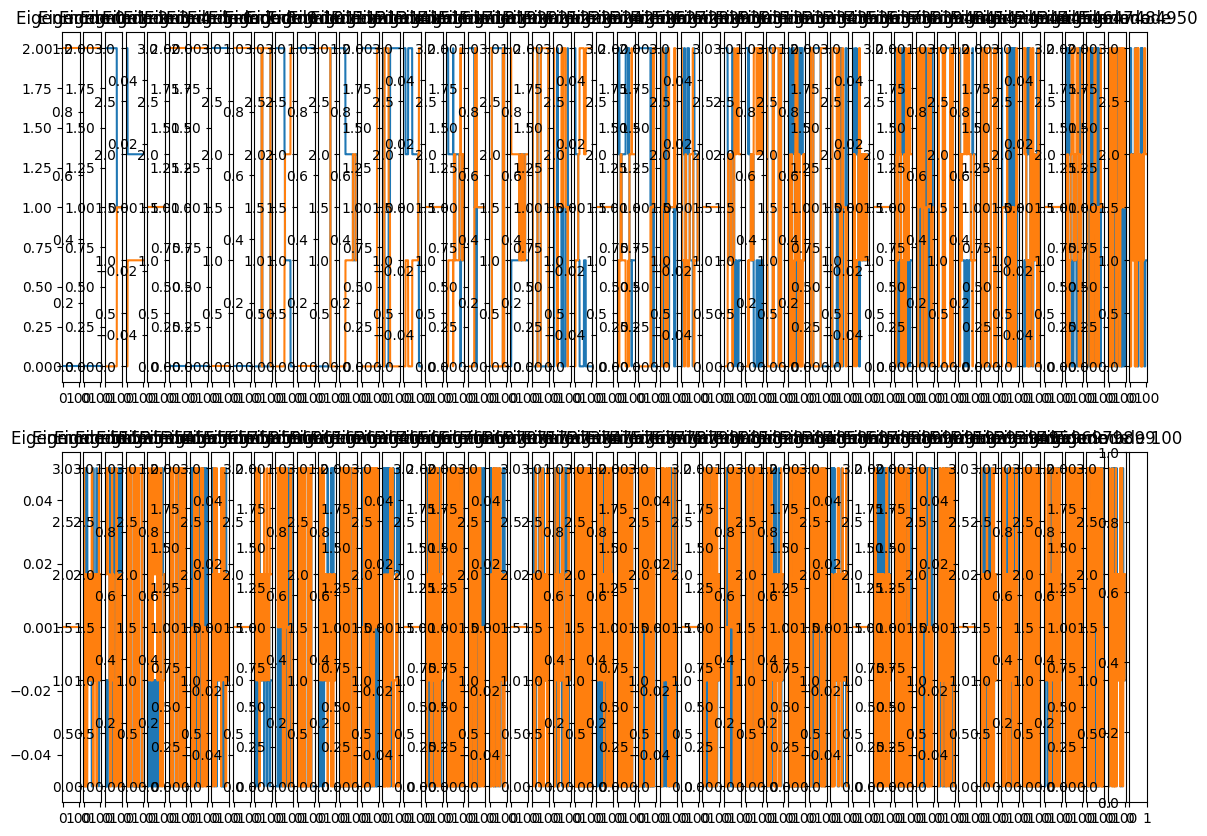

In [4]:
# EIGENMARKOV
# STOCHASTIC AND MODAL
multi_eme = EMERunMultiruns(
    n_runs=1,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx,
)

dir = multi_eme.run_multi(data_dir="../data")

In [5]:
plotter = EMEPlotMultiruns(
    dir=dir,
    file_id="eme",
)

Preparing to plot simulation data...
ARGMAX INDEX: 	 38 	 (83.75)
ALLEGED START LOC: 	 0
Plotting simulation data...
Beautifying plot...


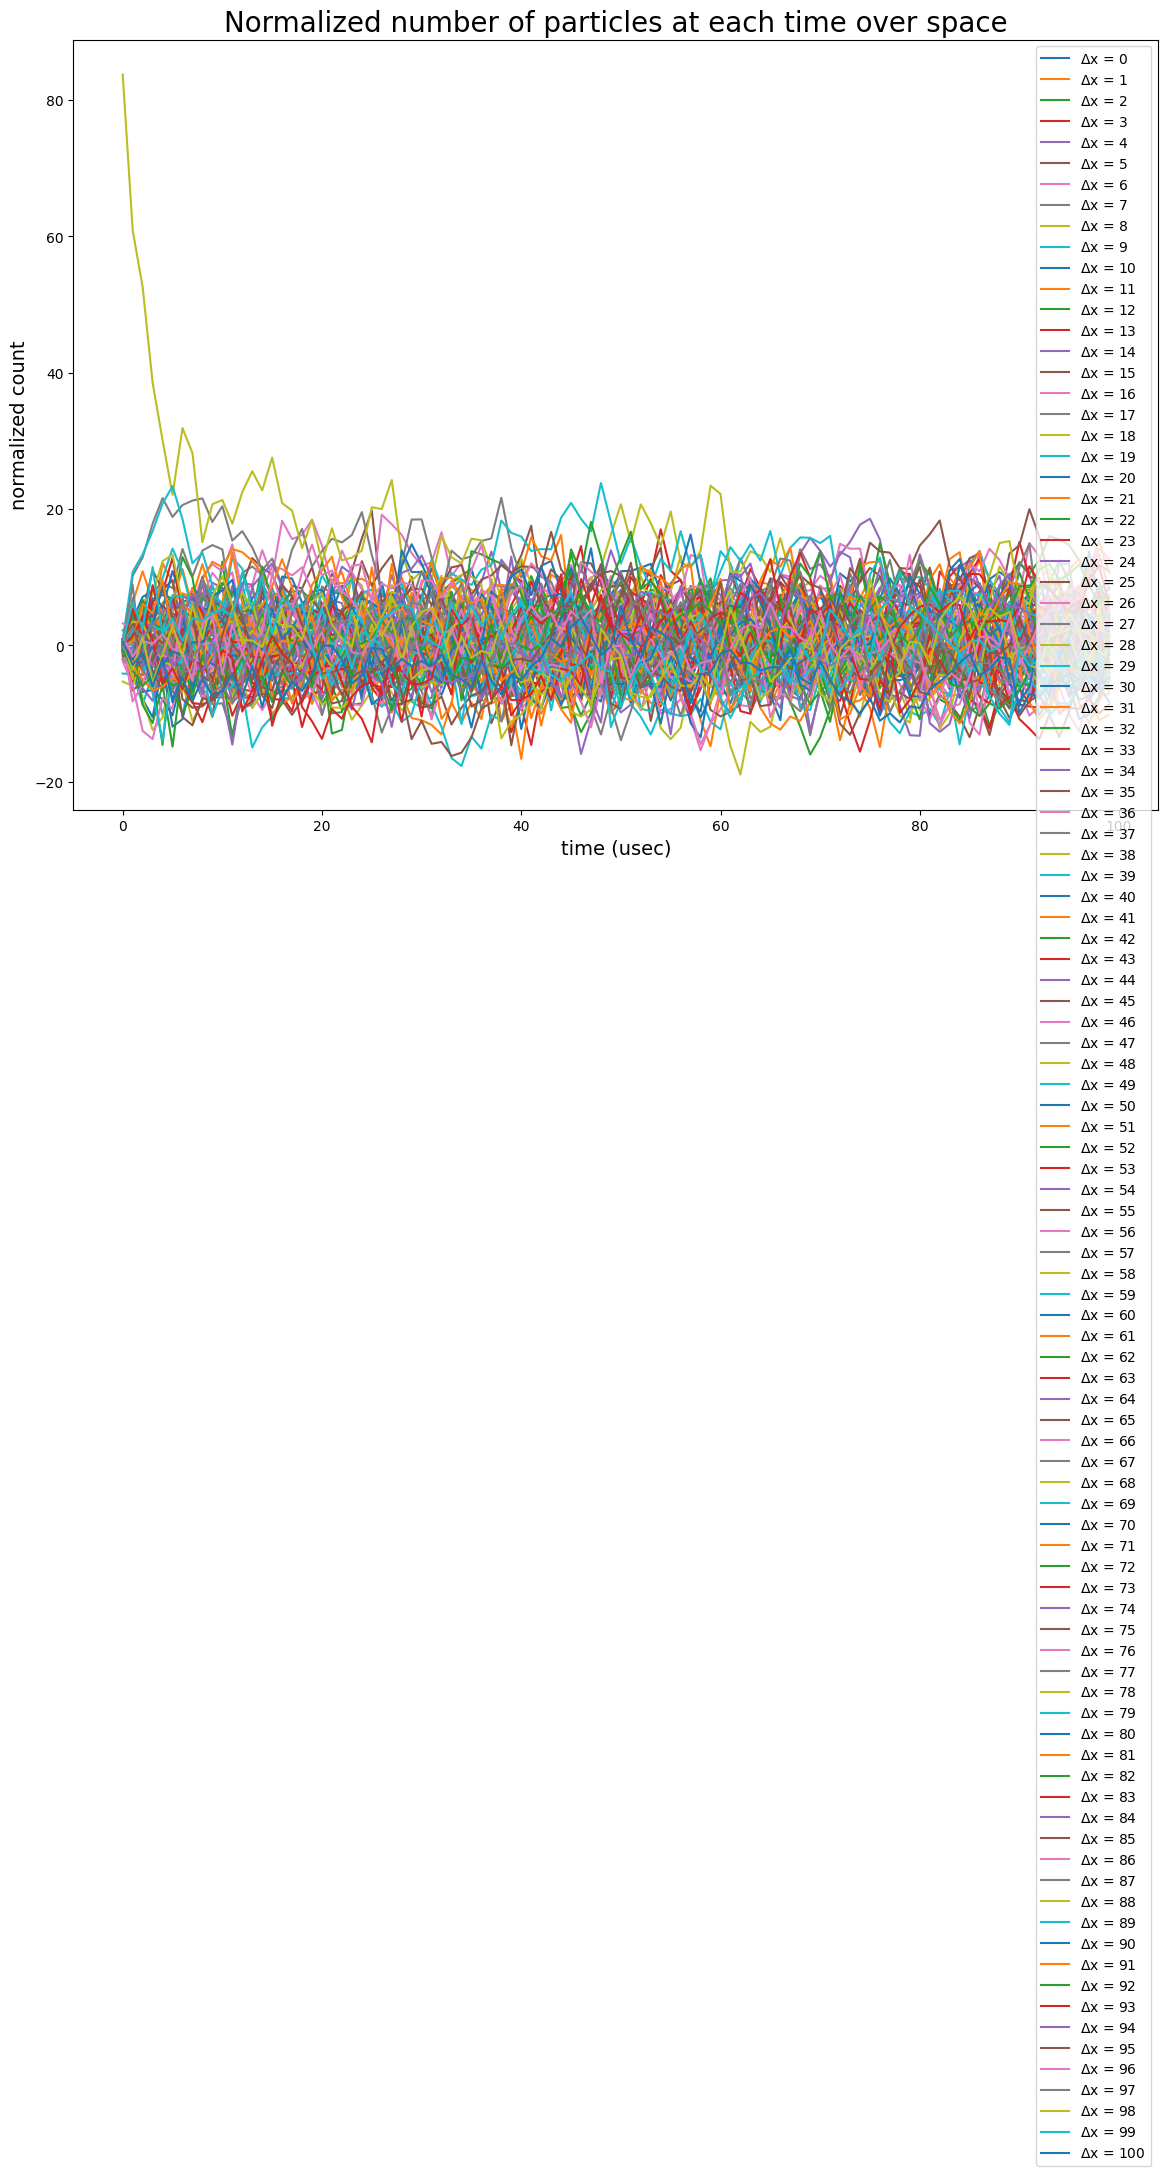

In [6]:
plotter.plot_multiruns_space()

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


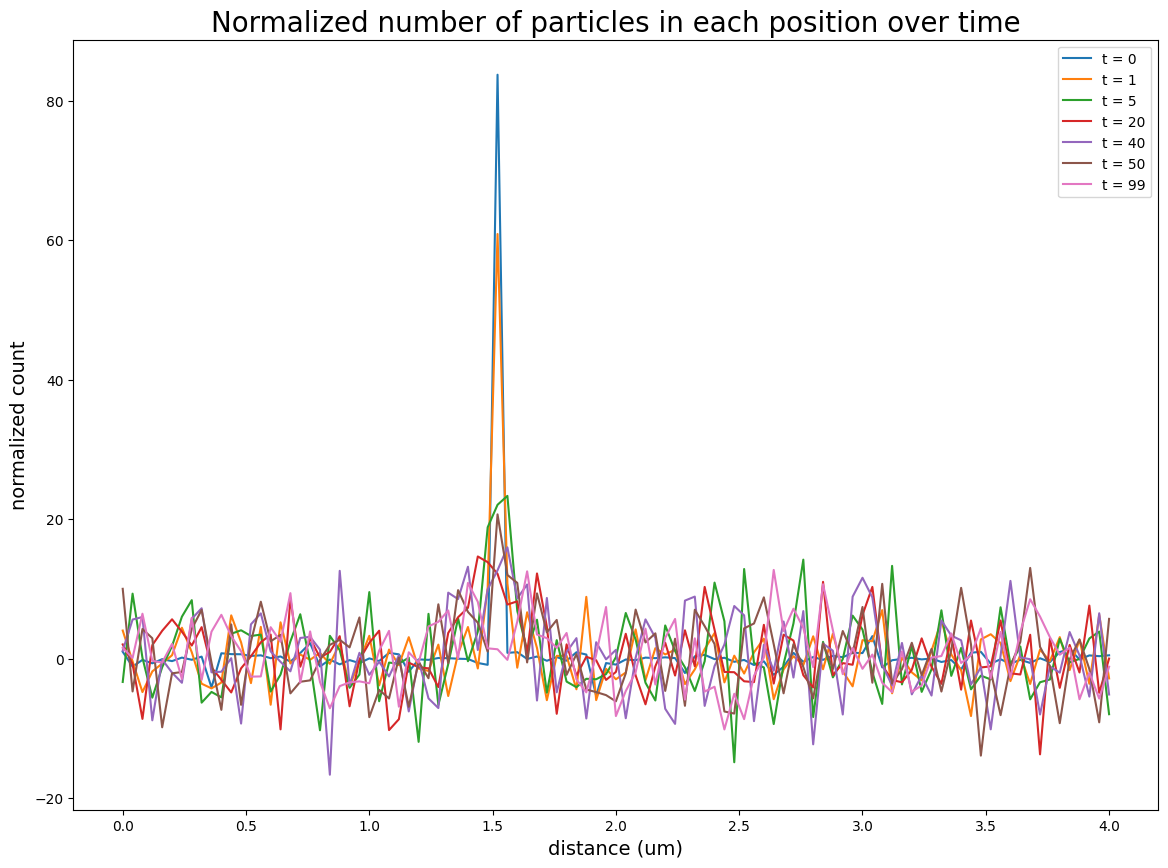

In [7]:
plotter.plot_multiruns_time([0, 1, 5, 20, 40, 50, 99])